# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определять рыночную стоимость объектов недвижимости. Для этого необходимо провести исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Загрузка данных из файла в датафрейм.
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Просмотр общей информации
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

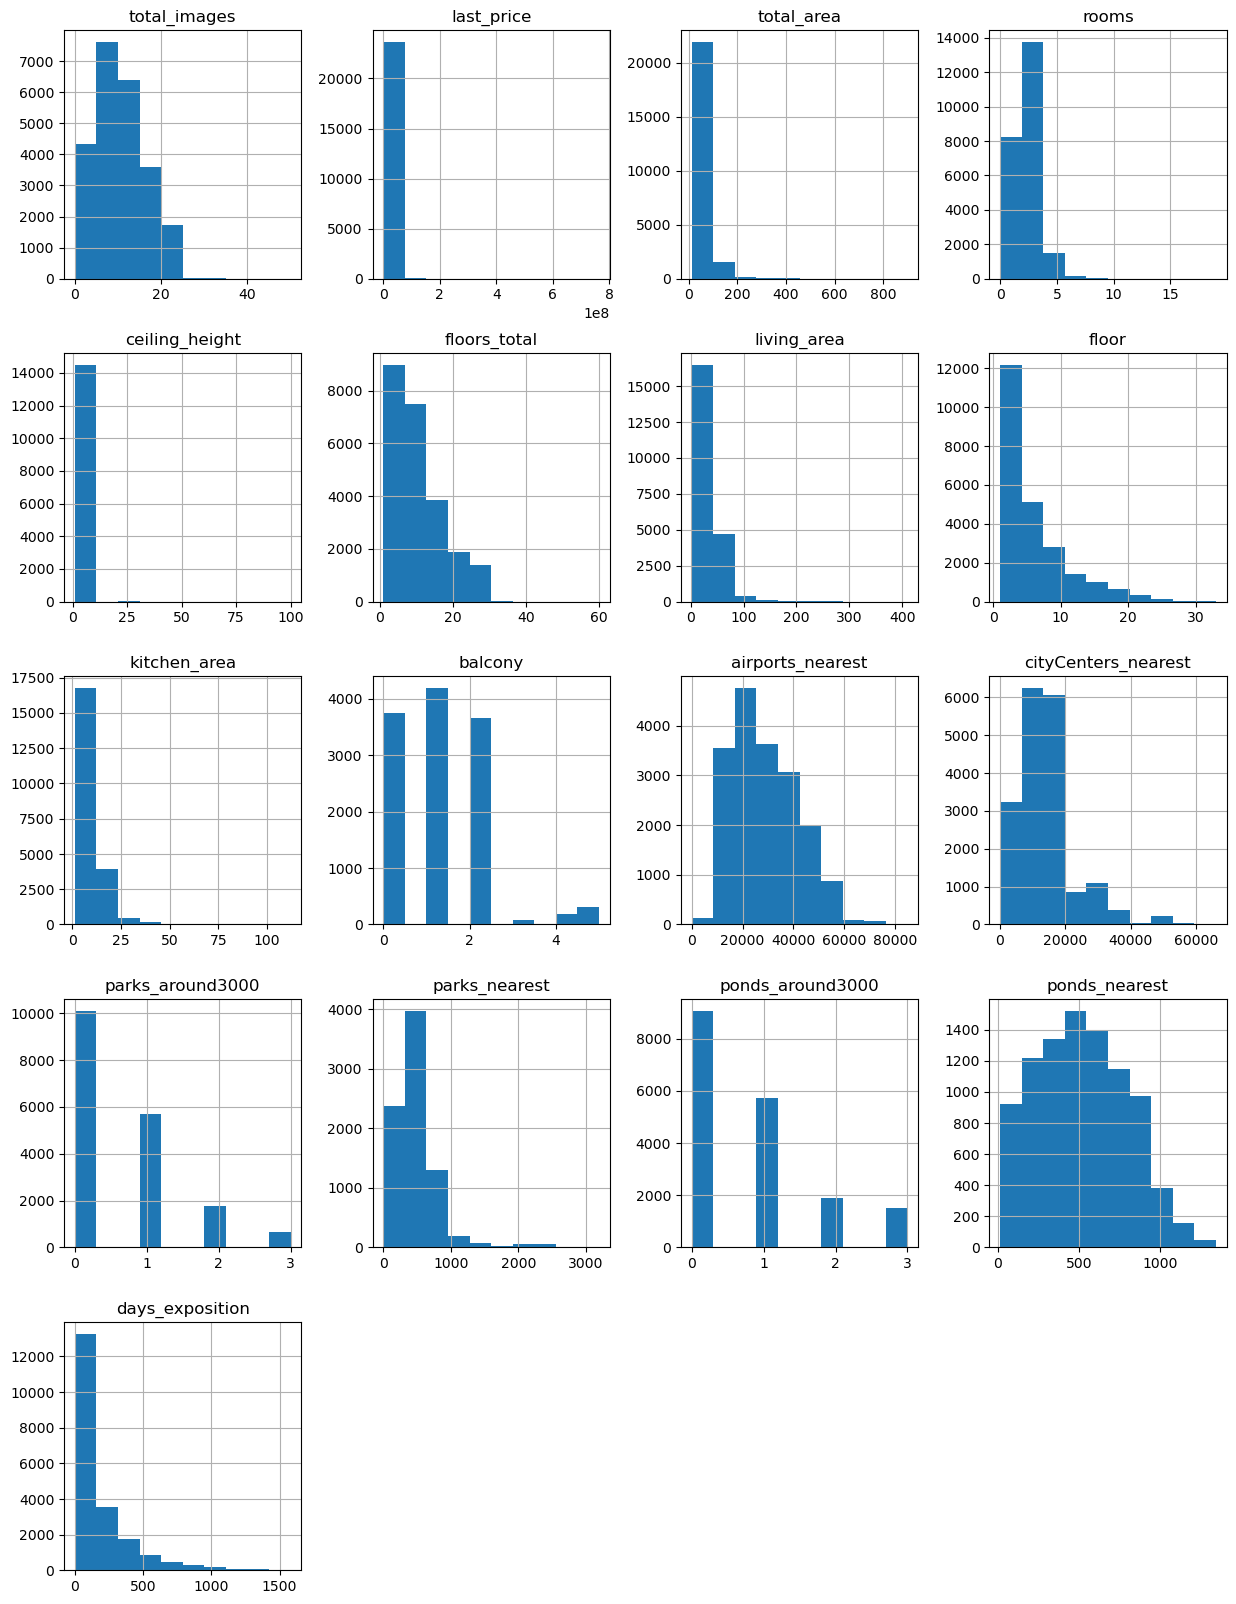

In [5]:
#Построение общий гистограмма для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))
plt.show()

In [6]:
#Определение дубликатов
data.duplicated().sum()

0

Больше всего пропусков в данных 'is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony'. К аномальным значениям можно отнести высокое значение в стобце "высота потолков". Высокое значение пропусков в столбце "балконы". К аномальным значениям можно отнести высокую площадь некоторых объектов. Явных дубликатов не обнаружено. Столбец "first_day_exposition" необходимо привести к типу данных datetime, стобец 'floors_total' необходимо привести к int.

### Предобработка данных

In [7]:
#Замена пропусков в данных
data['balcony'] = data['balcony'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в столбце 'balcony' говорят об отсутствие балкона

In [8]:
#Изменение типа данных 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['locality_name'] = data['locality_name'].fillna('Unknown')

Так как данные неизвестных городов нужны для последующего исследования, необходимо заполнить пропуски в столбце "locality_name"
Столбец с датой необходимо привести к типу datetime

In [9]:
#Приведение названий к общему типу населенного пункта
data["locality_name"] = data["locality_name"].str.replace("посёлок","поселок").sort_values()
data["locality_name"] = data["locality_name"].str.replace("поселок городского типа|городской поселок|коттеджный поселок|деревня|поселок", "", regex=True)
data["locality_name"] = data["locality_name"].str.replace(" ", "", regex=True)  

Названия одного и того же населённого пункта необходимо привести к одному значению

In [10]:
data['ceiling_height'] = data['ceiling_height'].mask(data['ceiling_height'] >= 20, data['ceiling_height']/10 )
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Высота потолков в некоторых квартирах выше 20м, что не соответсвует действительности,


In [11]:
#Замена значений и удаление строк с пропусками в столбце'floors_total'
data['floors_total'] = data['floors_total'].fillna(0) 
data = data.loc[data['floors_total'] > 0]
data['floors_total'] = data['floors_total'].astype('int') 

стобец 'floors_total' необходимо приввести к целочисленному типу данных, так как количество этажей это целое число. Так как для некоторых объявлений существуют пропуски в столбце 'floors_total' и состовляют 0,3% от общего числа, для последующего исследования необходимо исключить данные строки, чтобы исключить искажение в данных 

,days_exposition
year_publication,
2014,119
2015,1114
2016,2696
2017,7895
2018,7534
2019,1083


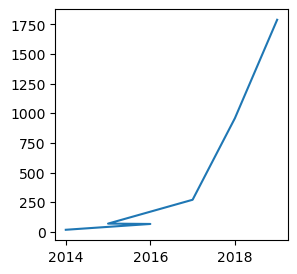

In [12]:
data['year_publication'] = data['first_day_exposition'].dt.year
plt.figure(figsize=(3, 3))
data[data['days_exposition'].isna()]['year_publication'].value_counts().plot()

#Количество значений без пропусков
data.pivot_table(index='year_publication', values='days_exposition', aggfunc='count')

Количество пропусков с каждым годом увеличивается. Количество пропусков в 2019 г. больше, чем значений за этот год, что может означать , что квартиры ещё на продаже.

### Добавление новых признаков

In [13]:
#Добавление столбца цена одного квадратного метра
data['price_one_m2'] = data['last_price']/data['total_area']  

In [14]:
#Добавление столбца день недели публикации 
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].unique()

array([3, 1, 4, 0, 2, 6, 5], dtype=int64)

In [15]:
#Добавление столбца месяц публикации 
data['month_publication'] = data['first_day_exposition'].dt.month

In [16]:
#Добавление столбца год публикации 
data['year_publication'] = data['year_publication']

In [17]:
#функция для определения этажа
def define_floor(floors):
    floor = floors['floor']
    floors_total = floors['floors_total']
    if floor == 1:
        return 'первый'
    if floors_total == floor:
        return 'последний'
    return 'другой'

In [18]:
#Добавление столбца тп этажа
data['type_floor'] = data.apply(define_floor, axis=1)
data['type_floor']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: type_floor, Length: 23613, dtype: object

In [19]:
#Добавление расстояние до города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km']

0        16.028
1        18.603
2        13.933
3         6.800
4         8.098
          ...  
23694     4.232
23695       NaN
23696       NaN
23697    10.364
23698       NaN
Name: cityCenters_nearest_km, Length: 23613, dtype: float64

### Исследовательский анализ данных

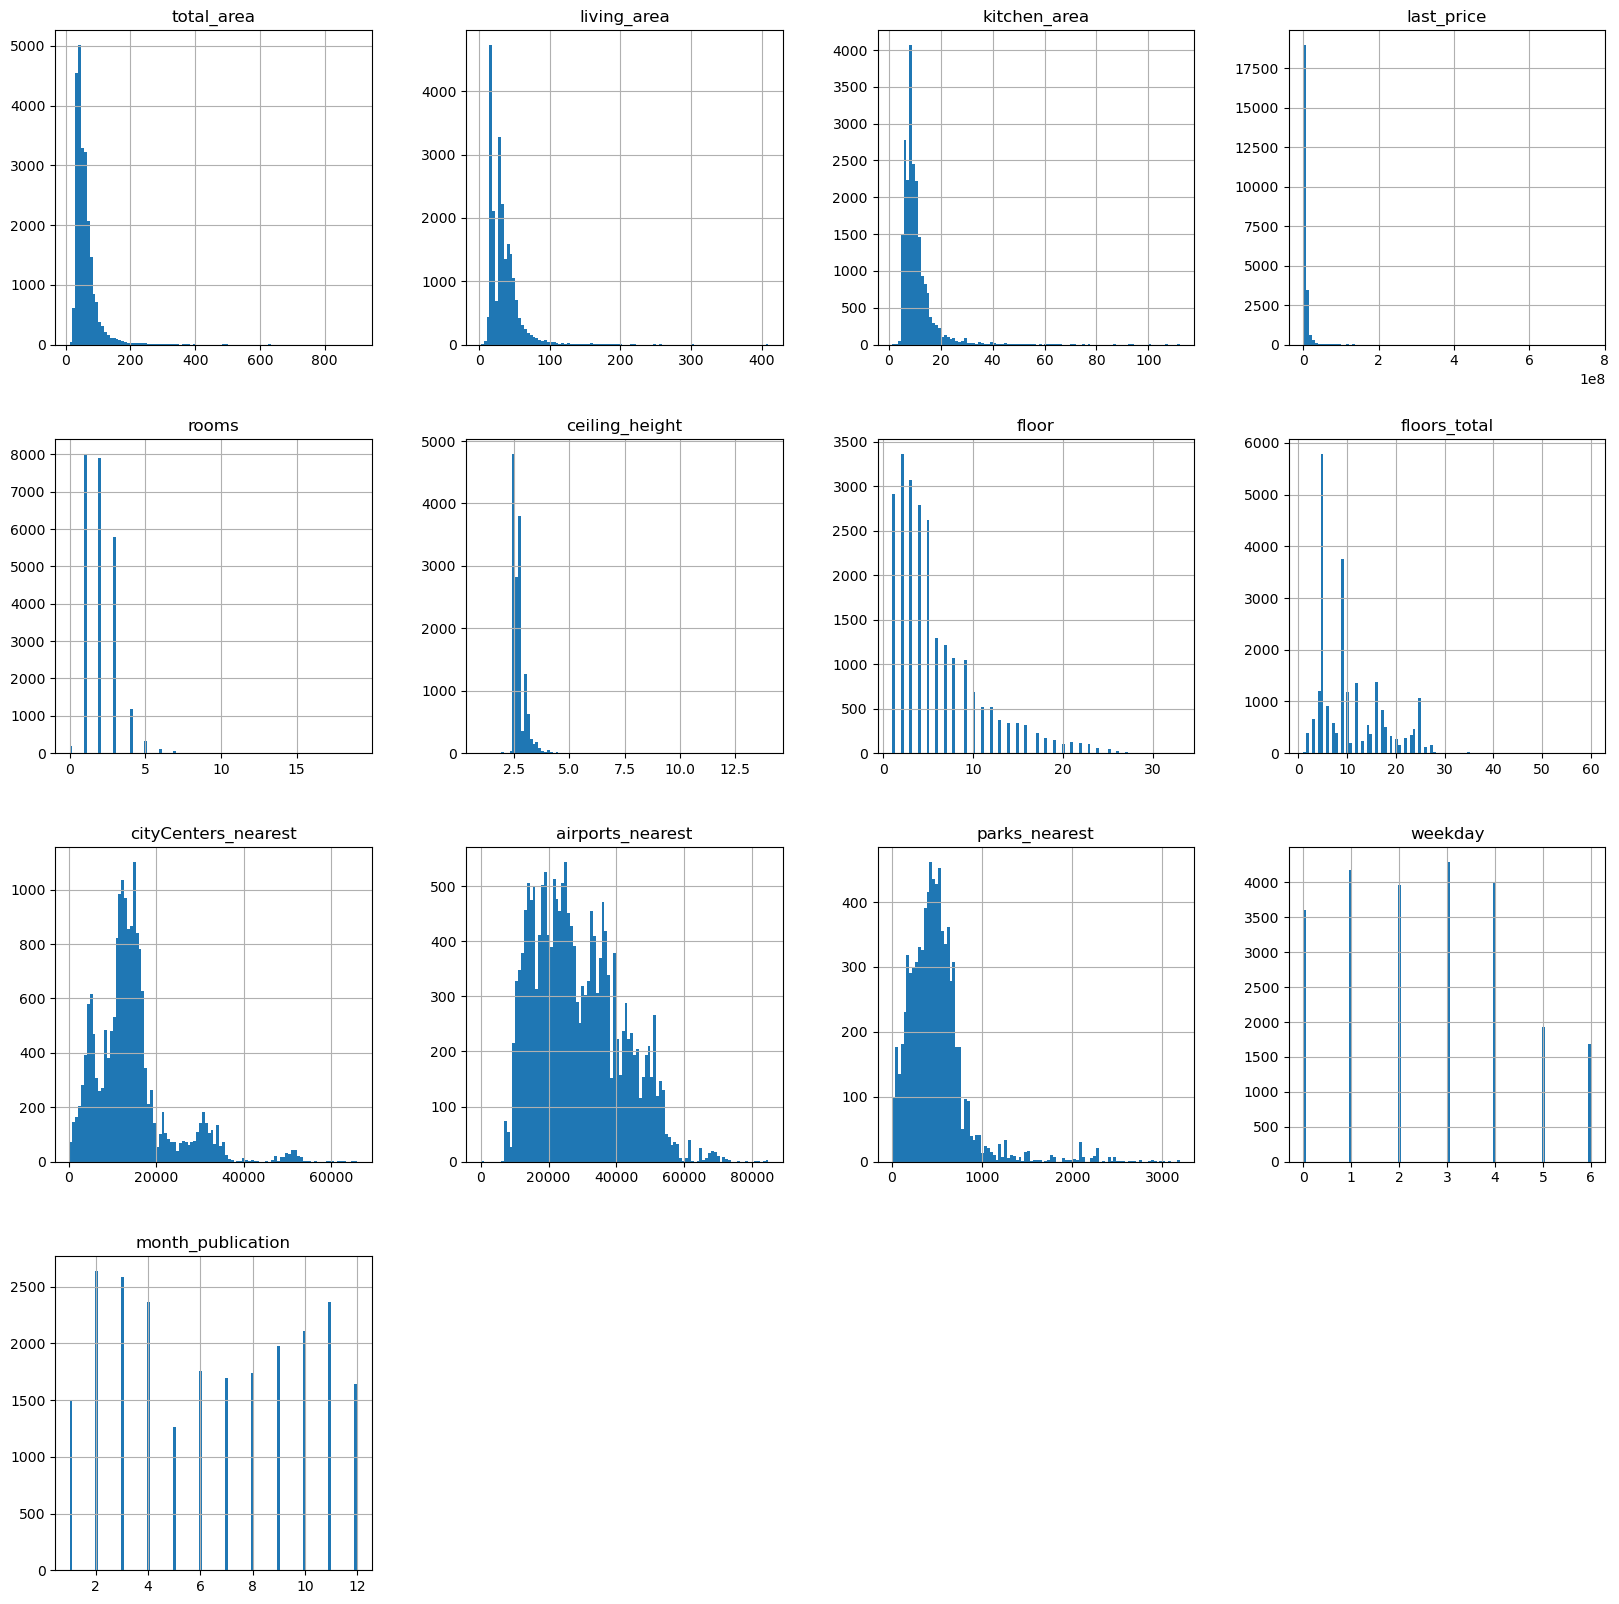

In [20]:
columns = ['total_area', 'living_area', 'kitchen_area', 'last_price', 
           'rooms', 'ceiling_height', 'floor',  
           'floors_total', 'cityCenters_nearest', 
           'airports_nearest', 'parks_nearest', 'weekday', 'month_publication', 'type_floor']

#ВЫделяю аномальные значения по полученным столбчатым диаграмам

abnormal_values = [200,120,40,60000000,10,5,30,30,40000,60000,1500]
calculate_abnormal_values = {}
for i in range(0, len(abnormal_values)):
    calculate_abnormal_values[columns[i]] = abnormal_values[i]
data[columns].hist(bins=100, figsize=(20,20))  

plt.show()

<Axes: >

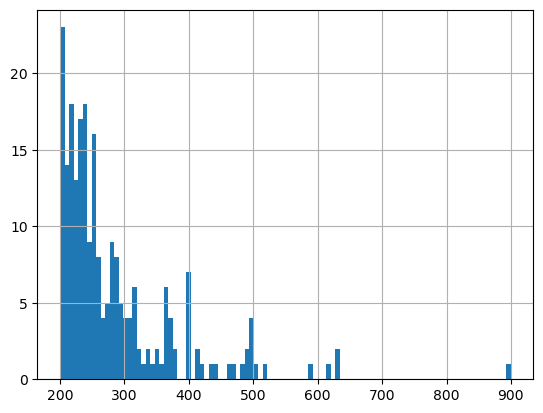

In [21]:
data['total_area'].hist(bins=100, range=(200,data['total_area'].max()))

1.3

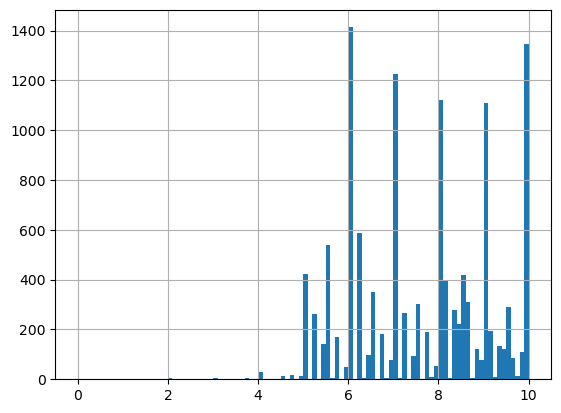

In [22]:
data['kitchen_area'].hist(bins=100, range=(0,10))
data['kitchen_area'].min()

1.3

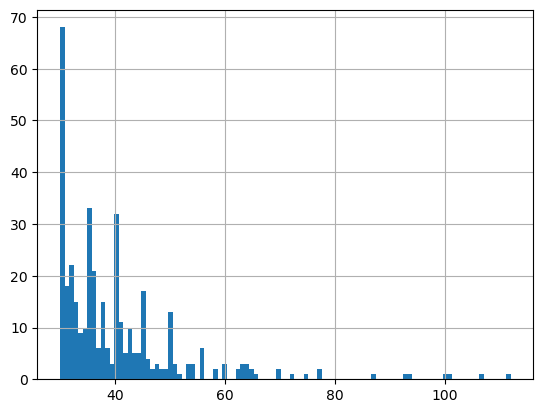

In [23]:
data['kitchen_area'].hist(bins=100, range=(30,data['kitchen_area'].max()))
data['kitchen_area'].min()

<Axes: >

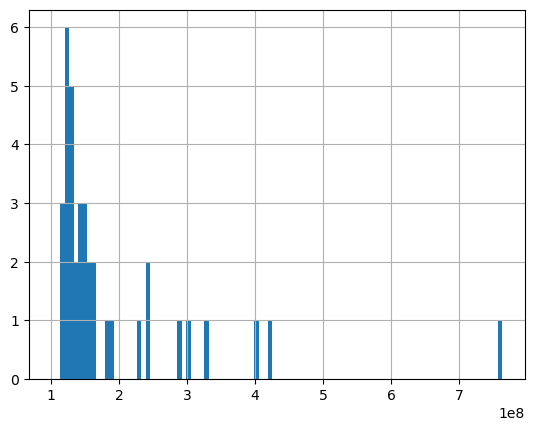

In [24]:
data['last_price'].hist(bins=100, range=(1e8,data['last_price'].max()))

<Axes: >

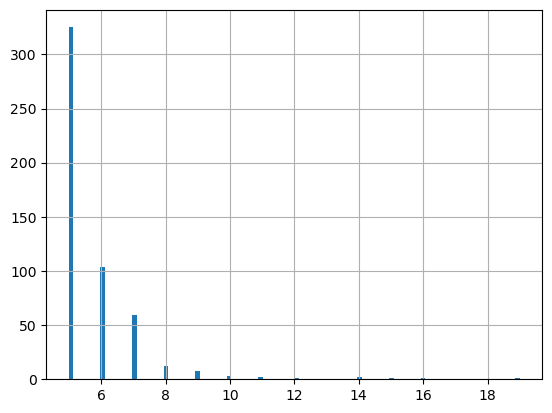

In [25]:
data['rooms'].hist(bins=100, range=(5,data['rooms'].max()))

<Axes: >

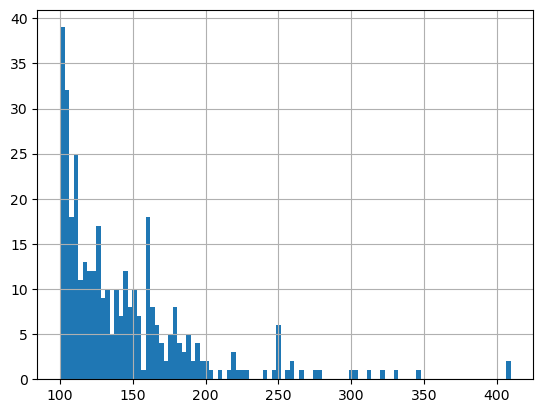

In [26]:
data['living_area'].hist(bins=100, range=(100,data['living_area'].max()))


In [27]:
#высчитваю количество объектов превышающих значение нормального распределения
for i,k in calculate_abnormal_values.items():
    display(i, data.loc[data[i] > k][i].count()/data.loc[data[i] > 0][i].count()*100)

'total_area'

0.9570999025960276

'living_area'

0.9934231706756197

'kitchen_area'

0.6126648582920213

'last_price'

0.4277304874433575

'rooms'

0.03416029719458559

'ceiling_height'

0.09658502932045533

'floor'

0.012704865963664082

'floors_total'

0.13551857027908357

'cityCenters_nearest'

1.657092355280601

'airports_nearest'

0.9568584070796461

'parks_nearest'

2.1379738968303292

In [28]:
for i in calculate_abnormal_values:
    display(f"Среднее значение: {i} {data[i].mean()}")
    display(f"Медианное значение: {i} {data[i].median()}")


'Среднее значение: total_area 60.340678439842456'

'Медианное значение: total_area 52.0'

'Среднее значение: living_area 34.46278119449938'

'Медианное значение: living_area 30.0'

'Среднее значение: kitchen_area 10.564127771022354'

'Медианное значение: kitchen_area 9.1'

'Среднее значение: last_price 6540555.460890188'

'Медианное значение: last_price 4650000.0'

'Среднее значение: rooms 2.071147249396519'

'Медианное значение: rooms 2.0'

'Среднее значение: ceiling_height 2.729577785443256'

'Медианное значение: ceiling_height 2.65'

'Среднее значение: floor 5.877313344344217'

'Медианное значение: floor 4.0'

'Среднее значение: floors_total 10.67382374115953'

'Медианное значение: floors_total 9.0'

'Среднее значение: cityCenters_nearest 14185.084014582413'

'Медианное значение: cityCenters_nearest 13093.0'

'Среднее значение: airports_nearest 28788.008185387975'

'Медианное значение: airports_nearest 26726.0'

'Среднее значение: parks_nearest 490.5546302050963'

'Медианное значение: parks_nearest 455.0'

'Среднее значение:'

7871.0

'Медианное значение:'

3336.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_publication,price_one_m2,weekday,month_publication,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,NaN,2019,120370.370370,3,3,другой,16.028
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,2018,82920.792079,1,12,первый,18.603
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,2015,92785.714286,3,8,другой,13.933
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,2015,408176.100629,4,7,другой,6.800
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,2018,100000.000000,1,6,другой,8.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3.0,381.0,NaN,2017,72490.845228,1,3,другой,4.232
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,NaN,NaN,45.0,2018,52542.372881,0,1,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,NaN,NaN,2018,44091.710758,6,2,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,173.0,3.0,196.0,602.0,2017,149511.400651,1,3,другой,10.364


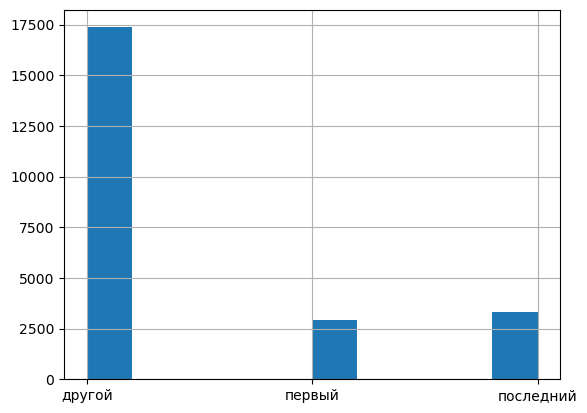

In [29]:
data['type_floor'].hist()
display('Среднее значение:', data.groupby('type_floor')['type_floor'].count().mean())
display('Медианное значение:', data.groupby('type_floor')['type_floor'].count().median())
data.groupby('type_floor')['type_floor'].count()/(len(data['type_floor'])/100)
data

Полная Площадь объектов в основном находится от 12м2 до 200м2, выбивающимися из общего списка значений, можно называть объекты имеющие площадь от 400 до 900м2. Количество объектов с площадью от 200м2 составяет менн 1% от общего количества объявлений

Жилая площадь объектов в основном находится от 12м2 до 150м2, выбивающимися из общего списка значений, можно называть объекты имеющие площадь от 200 до 400м2. Количество объектов с жилой площадью от 120м2 составяет менее 1% от общего количества объявлений. С увеличение числа площади в данном диапазоне, количество объёктов уменьшается.

Кухонная площадь объектов в основном находится от 5м2 до 30м2, выбивающимися из общего списка значений, можно называть объекты имеющие площадь от 5 до 100м2. С увеличение числа площади в данном диапазоне, количество объёктов уменьшается.

Большинство объеrтов имеет цену менее 0.6e8.

Основная масса объектов имеет до 10 комнат. Количество объектов имеюшие более 10 комнат составляет 0.03%.

Количество объектов с высотой потолков выше 5 0.09%.

Количество квартир находящихся выше 30 этаже составляет 0,012%

Количество объектов на расстояние выше 40км от цетнра города составялет 1,65%

Количество объектов на расстояние выше 60км от аэропорта составялет 1,65%

Количество объектов на расстояние выше 1,5км от парка составялет 2,13%

Чаще всего продают квартиры находящиеся между первым и последним этажом. Количество таких объялений составляет 73%, количество объявлений с первым и последним этажом составляют 12% и 14% соответственно.

<Axes: >

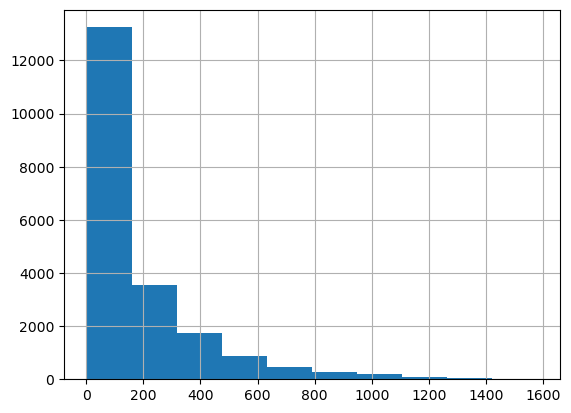

In [30]:
data.loc[data['days_exposition'] > 1]['days_exposition'].hist()

180.88483929357665

95.0

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

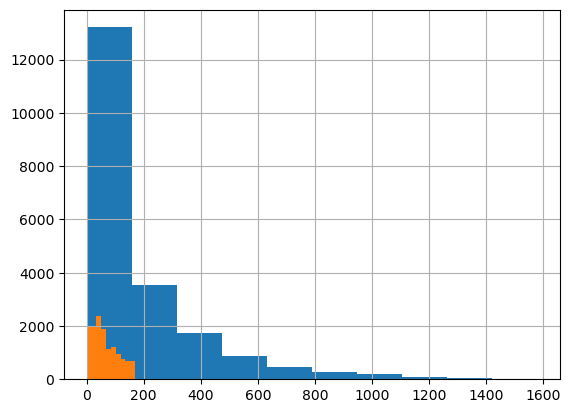

In [31]:
#Расчёт среднего и медианного значения
data['days_exposition'].hist()
display(data['days_exposition'].mean())
display(data['days_exposition'].median())
data['days_exposition'].hist(range=(0,170))
#display('Быстрая продажа занимает до:', int(data['days_exposition'].min()+(data['days_exposition'].max()-data['days_exposition'].min())*0.25))
#display('Долгая продажа занимает от:', int(data['days_exposition'].max()-(data['days_exposition'].max()-data['days_exposition'].min())*0.2))
data['days_exposition'].describe()

В среднем продажа квартиры занимает 180 дней. Быстрой продажей можно считать ту, которая произошла до 45 дней, долгая считается от 232

In [32]:
#Зависимость цены от общей площади
dependence_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
display('коэффициент корреляции Пирсона:', data['total_area'].corr(data['last_price']))


'коэффициент корреляции Пирсона:'

0.6535810085611218

С увеличением общей площади цена возрастает. Коэффициент корреляции Пирсона положительный, что говорит о росте цен с увеличением площади

'коэффициент корреляции Пирсона:'

0.5663955721081744

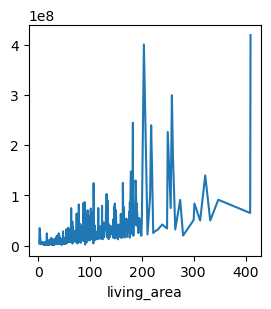

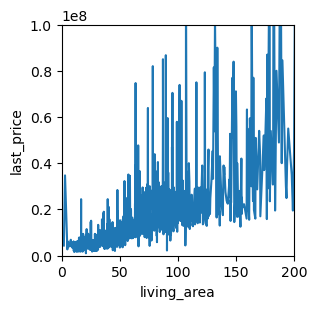

In [33]:

#Зависимость цены от жилой площади
dependence_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='mean')
dependence_living_area.plot(figsize=(3,3), legend=False)

#Более узкий диапозон
dependence_living_area.plot(xlim=(0,200), ylim=(0,100000000), ylabel='last_price', figsize=(3,3), legend=False)
display('коэффициент корреляции Пирсона:', data['living_area'].corr(data['last_price']))

С увеличением жилой площади цена возрастает. Основное количество объектов имеют жилую площадь (0, 200м2), в данном диапозоне так же наблюдается рост цены. Коэффициент корреляции Пирсона положительный, что говорит о росте цен с увеличением площади

'коэффициент корреляции Пирсона:'

0.5200184586898166

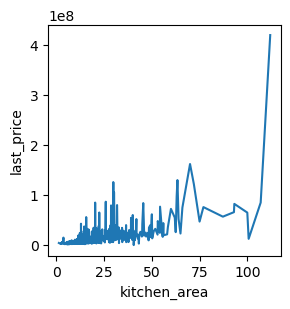

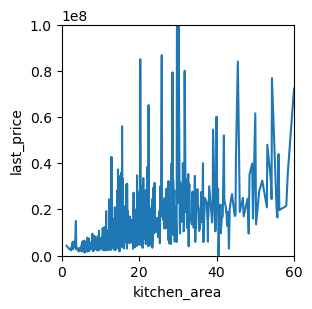

In [34]:
#Зависимость цены от кухонной площади
dependence_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
dependence_kitchen_area.plot(ylabel='last_price', figsize=(3,3), legend=False)
#Более узкий диапозон
dependence_kitchen_area.plot(xlim=(0,60),ylim=(0,100000000), ylabel='last_price', figsize=(3,3), legend=False)
display('коэффициент корреляции Пирсона:', data['kitchen_area'].corr(data['last_price']))

 С увеличением кухонной площади цена возрастает.  Коэффициент корреляции Пирсона положительный, что говорит о росте цен с увеличением площади

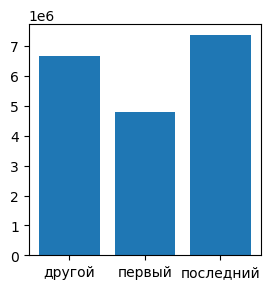

In [35]:
#Зависимость цены от этажа
dependence_type_floor = data.pivot_table(index='type_floor', values='last_price', aggfunc='mean')
index = dependence_type_floor.reset_index()['type_floor']
values = dependence_type_floor.reset_index()['last_price']
plt.figure(figsize=(3,3))
plt.bar(index, values)
plt.show()


Самые дорогие объекты находятся на последжнем этаже, самые низкие цены квартиры, находящиеся на первом этаже

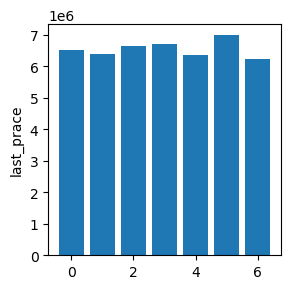

weekday
0   -0.004309
1   -0.024013
2    0.012900
3    0.023877
4   -0.027502
5    0.066145
6   -0.047098
Name: last_price, dtype: float64

In [36]:
#Зависимость цены от дня публикации
dependence_days = data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
index = dependence_days.reset_index()['weekday']
values = dependence_days.reset_index()['last_price']
plt.figure(figsize=(3,3))
plt.bar(index, values)
plt.ylabel('last_prace')
plt.show()
(dependence_days['last_price'] - dependence_days['last_price'].mean())/dependence_days['last_price'].mean()

Значения цены от среднего значения по дня недели составляет менее 1%, что говорит об отсутствии зависомсти конечной цены от дня  недели

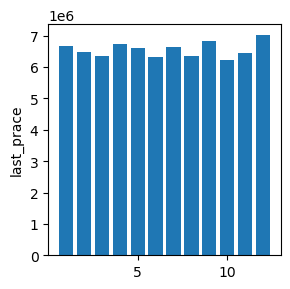

month_publication
1     0.016786
2    -0.013337
3    -0.030377
4     0.027835
5     0.006319
6    -0.036525
7     0.014211
8    -0.032375
9     0.042715
10   -0.048630
11   -0.016231
12    0.069610
Name: last_price, dtype: float64

In [37]:
#Зависимость цены от месяца публикации

dependence_month = data.pivot_table(index='month_publication', values='last_price', aggfunc='mean')
index = dependence_month.reset_index()['month_publication']
values = dependence_month.reset_index()['last_price']
plt.figure(figsize=(3,3))
plt.bar(index, values)
plt.ylabel('last_prace')
plt.show()
(dependence_month['last_price'] - dependence_month['last_price'].mean())/dependence_month['last_price'].mean()

Значения цены от среднего значения по месяцам составляет менее 1%, что говорит об отсутствии зависомсти конечной цена от месяца публикации

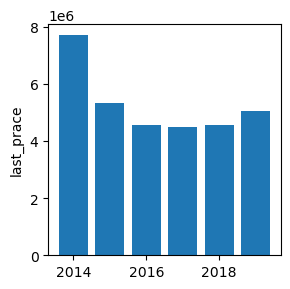

12.222222222222221

In [38]:
#Зависимость цены от года публикации
dependence_years = data.pivot_table(index='year_publication', values='last_price', aggfunc='median')
index = dependence_years.reset_index()['year_publication']
values = dependence_years.reset_index()['last_price']
plt.figure(figsize=(3,3))
plt.bar(index, values)
plt.ylabel('last_prace')
plt.show()
display((dependence_years['last_price'][2019]-dependence_years['last_price'][2017])/dependence_years['last_price'][2017]*100)


Из графика видно, что средняя цена на квартиры падает с 2014-2017, в 2019 наблюдается рост по сравнению с 2017, который составляет 12,2%

Коэффициент корреляции Пирсона отрицательный, что говорит о спаде цен по годам.

In [39]:
#средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
top_city_publication = data['locality_name'].value_counts().head(10)
top_data = data.query('locality_name in @top_city_publication.index')
top_data.pivot_table(index='locality_name', values='price_one_m2', aggfunc='mean').sort_values(by='price_one_m2')



,price_one_m2
locality_name,
Выборг,58141.909153
Всеволожск,68654.473986
Гатчина,68746.146763
Колпино,75424.579098
Шушары,78551.344545
Мурино,86041.116064
Парголово,90175.913458
Кудрово,95260.846171
Пушкин,103125.819291


Населённые пункты с самой высокой и низкой стоимостью квадратного метра:

Самая высокая цена за квадратный метр в г.Санкт-Петербург.

Самая низкая цена в г.Выборг

,last_price
cityCenters_nearest_km,
0.181,31099000.0
0.208,5800000.0
0.215,10990000.0
0.287,9590000.0
0.291,11500000.0
...,...
28.644,4775000.0
28.806,4370000.0
29.263,4850000.0


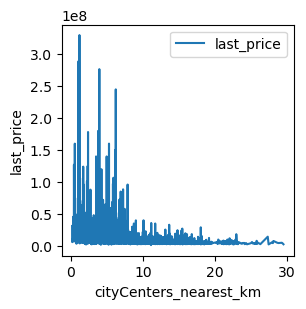

In [40]:
#data['price_km'] = data['last_price']/data['cityCenters_nearest_km']
dependence_hearest = data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price')
dependence_hearest.plot(ylabel='last_price', figsize=(3,3))
dependence_hearest

При удаление от центра города цена уменьшается

### Общий вывод

По данному исследованию можно сделать следующие выводы:
1. С увеличением общей площади цена возрастает
2. С увеличением жилой площади цена возрастает
3. С увеличением кухонной площади цена возрастает
4. Самые дорогие объекты находятся на последжнем этаже, самые низкие цены квартиры, находящиеся на первом этаже
5. Цена падает по годам
6. Цена независит от месяцы и дня публикации
7. Чаще всего публикуют объявление в субботу 
8. С 2014-2018 год наблюдается спад цен на объекты
9. При удаление от центра города цена уменьшается